# Sales Analysis Using Pandas, Numpy & Matplotlib

#### In this task we use Python Pandas, Numpy and Matplotlib to analyze and answer business questionsabout 1 year(2019) of sales data. The data contains thousands of store purchases broken down by date and time of purchase, product name, price, address, etc.

#### We have answered the following quesitons through our data analysis mainly using pandas and matplotlib library.
    Q1. What was the best month for sales?
    Q2. What city has the highest number of sales?
    Q3. What time should we display advertisements to maximize likelihood of customers buying product?
    Q4. What products are most often sold together?
    Q5. What product sold the most and why?

#### To answer these questions we walk through many different pandas & matplotlib library methods:
- Converting all separate data (monthly data) to a single csv file.
- Adding columns
- Parsing cells as strings to make new columns
- Using pandas DataFrame.apply() method
- Using groupby to perform aggregate analysis
- Plotting bar charts and line graphs to visualize our results

#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

%matplotlib inline
plt.style.use('fivethirtyeight')

#### Merge 12 months of sales data into a single csv file

In [2]:
# add all file names in a list
files = glob.glob('data/*.csv')

# create an empty dataframe
df = pd.DataFrame()

# loop through all the files
for f in files:
    # read a file
    data = pd.read_csv(f)
    # concatenate
    df = pd.concat([df, data])

# save as csv file
df.to_csv('data/all_data.csv', index=False)
print(df.shape)

#### Read in updated dataset

In [3]:
df = pd.read_csv('data/all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleanup the data

#### Handle Missing Data

In [4]:
# check which columns have missing values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


#### Drop NaN rows

In [6]:
# By looking at the null rows, we can simply remove them.
df = df.dropna()
# check null again
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### We don't have any null values now

In [7]:
df[df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### This is also a unusuable data, so let's get rid of it

In [8]:
df = df[df['Order Date'] != 'Order Date'].copy()

all_data = df.copy()

### Add new columns (using existing columns)

#### Add a new Month column to our dataset

In [9]:
months = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}
def extract_month(s):
    d = s[:2]
    return months[d]

all_data['Month'] = all_data['Order Date'].apply(extract_month)
# df['Month'] = df['Month'].astype(int)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr


#### Add Sales column: sales = quantity * price

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


#### Add a city column

In [11]:
def ext_city_state(addr):
    city = addr.split(',')[1]
    state = addr.split(',')[2].split(' ')[1]
    return (city+' '+state).strip()

In [12]:
all_data['City'] = all_data['Purchase Address'].apply(ext_city_state)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA


### What was the best month for sales?

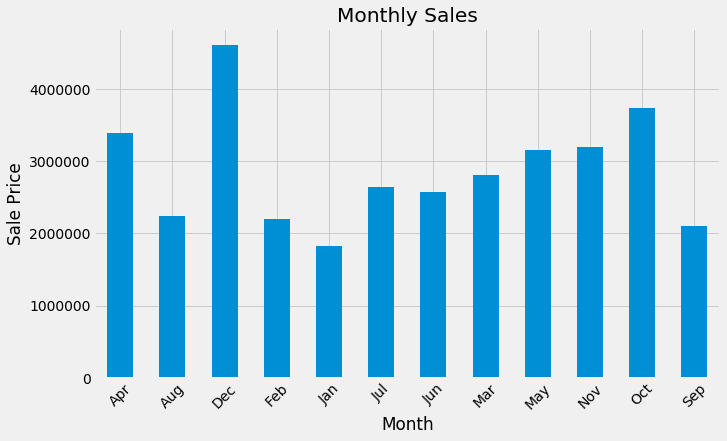

In [13]:
all_data.groupby('Month')['Sales'].sum().plot.bar(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Sale Price")
plt.title("Monthly Sales")
plt.show()

#### December has the highest number of sales
---

### What city has the highest number of sales?

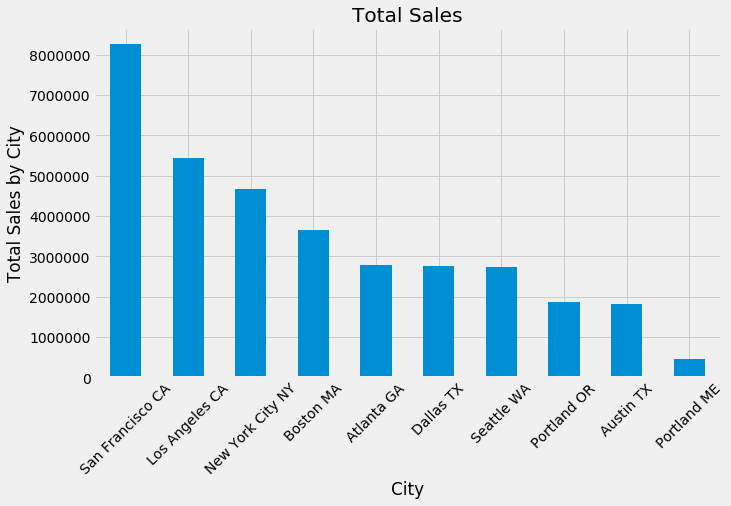

In [14]:
ax = all_data.groupby('City')['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Total Sales by City")
plt.title("Total Sales")
plt.show()

### What time should we display advertisements to maximize likelihood of customers buying product?

In [15]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA


In [16]:
# add Hour column
all_data['Hour'] = all_data['Order Date'].dt.hour
# add Minute column
all_data['Minute'] = all_data['Order Date'].dt.minute

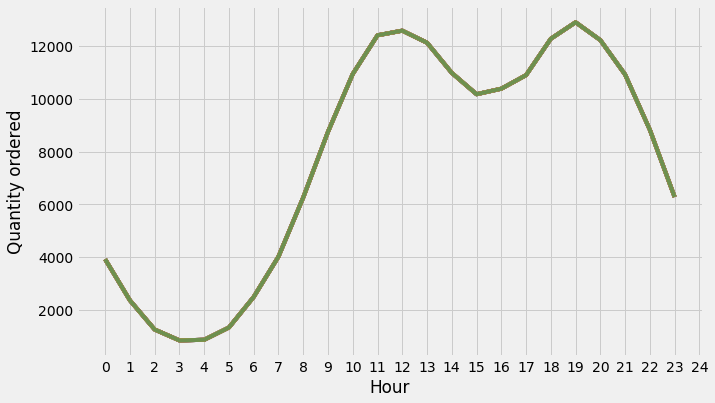

In [17]:
# group by hour and plot
ax = all_data.groupby('Hour').count().plot(figsize=(10, 6), legend=False)
plt.xticks(np.arange(25))
plt.ylabel("Quantity ordered")
plt.show()

### Ad Recommendation hour: around `11am` or `7pm`
---

### What products are most often sold together?

In [18]:
dup = all_data[all_data['Order ID'].duplicated(keep=False)].copy()
dup['Grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dup = dup[['Order ID', 'Grouped']].drop_duplicates()
dup.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [19]:
from itertools import combinations
from collections import Counter

# create object of counter
count = Counter()
# loop thorugh each item in Grouped column
for row in dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

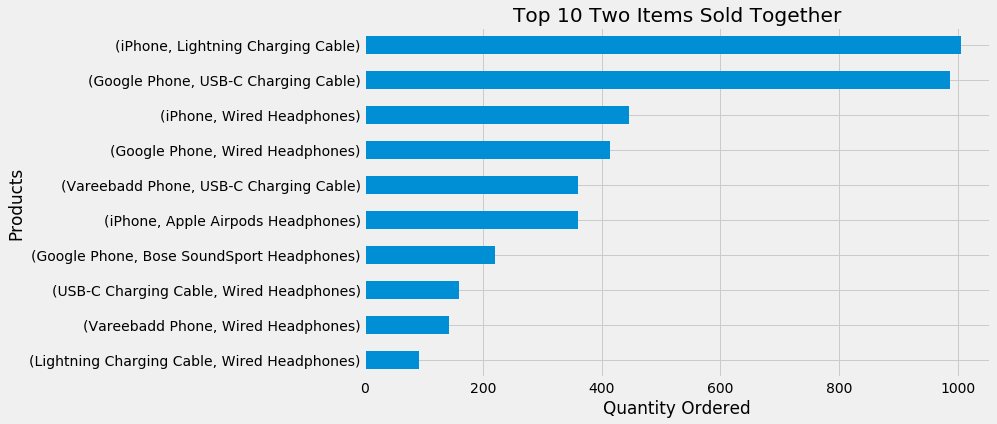

In [20]:
top_10_items_sold_together = pd.DataFrame(count.most_common(10))
top_10_items_sold_together.columns = ['Products', 'count']
top_10_items_sold_together.sort_values('count').plot(x='Products', y='count', kind='barh', figsize=(10, 6), legend=False)
plt.title("Top 10 Two Items Sold Together")
plt.xlabel('Quantity Ordered')
plt.show()

### What product sold the most and why?

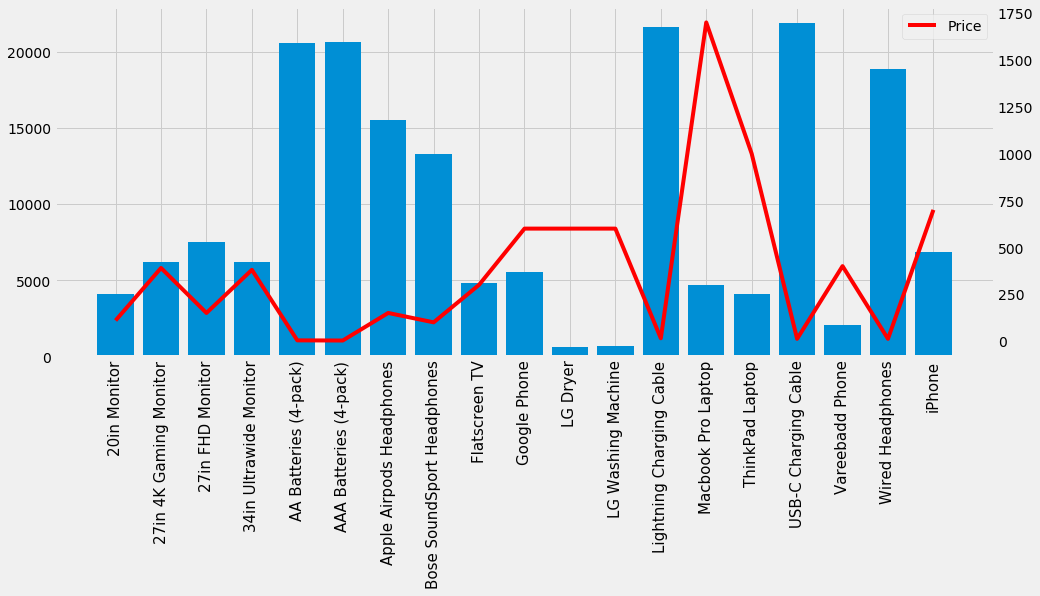

In [21]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()
result1 = all_data.groupby('Product')['Product'].count()
result2 = all_data.groupby('Product')['Price Each'].mean()
ax1.bar(result1.index, result1.values, label="Quantity Ordered")
ax2.plot(result2, color='red', label='Price')

ax2.grid(False)
ax1.set_xticklabels(result1.index, rotation='vertical', fontsize=15)
plt.legend()
plt.show()

#### From the above analysis we can see that the higher number of sales are for those products that are cheaper but in case of `Macbook Pro` even though its price is very high but still its quantity sold is `higher` than some products with cheaper price as compared to them.